## 1.0 Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import shutil
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report


## 2.0 Define Directories

In [ ]:
# Define the directories
base_dir = './Melanoma_Classification'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create directories if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)


### 2.1 Split Training Data

In [ ]:
# Split the training data into training and validation sets
validation_split = 0.2

# Function to check if a file is an image
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if not os.path.isdir(category_dir):
        continue
    
    images = [img for img in os.listdir(category_dir) if is_image_file(img)]
    
    if len(images) == 0:
        print(f"No images found in {category_dir}")
        continue
    
    # Split images into training and validation sets
    train_images, val_images = train_test_split(images, test_size=validation_split, random_state=42)
    
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(validation_dir, category)
    
    # Create category directories if they do not exist
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)
    
    for image in train_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(train_category_dir, image)
        if not os.path.exists(dst):
            shutil.copy2(src, dst)
    
    for image in val_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(val_category_dir, image)
        if not os.path.exists(dst):
            shutil.copy2(src, dst)


### 2.2 Count and Print Image Counts

In [162]:
# Function to count images in directories
def count_images(base_dir, categories, types):
    for category in categories:
        for t in types:
            path = os.path.join(base_dir, category, t)
            if os.path.exists(path):
                print(f"Total {category} {t} images: {len(os.listdir(path))}")
            else:
                print(f"No directory found at {path}")

# Print image counts for each category and type
categories = ['train', 'validation', 'test']
types = ['Benign', 'Malignant']
count_images(base_dir, categories, types)


Total train Benign images: 5590
Total train Malignant images: 5590
Total validation Benign images: 1118
Total validation Malignant images: 1118
Total test Benign images: 1000
Total test Malignant images: 1000


## 3.0 Models with Hyperparameters

### 3.1 Define CNN Model 1 with Hyperparameters

In [ ]:
# Regularization strength
l2_reg = 0.0001

model_1 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),

    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)),
    
    Dense(1, activation='sigmoid')
])


### 3.2 Define CNN Model 2 with Hyperparameters

In [ ]:
# Regularization strength
l2_reg = 0.001

model_2 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)),

    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(l2_reg)),

    Dense(1, activation='sigmoid')
])


## 3.3 Define CNN Model 3 with Hyperparameters

In [ ]:
# Regularization strength
l2_reg = 0.005

model_3 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dropout(0.4),
    Dense(1024, activation='relu', kernel_regularizer=l2(l2_reg)),

    Dropout(0.4),
    Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)),

    Dense(1, activation='sigmoid')
])


In [188]:
model_1.summary()
model_2.summary()
model_3.summary()


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,191,621 (508.09 MB)

 Trainable params: 44,397,057 (169.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 88,794,116 (338.72 MB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)             │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_67 (LeakyReLU)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 112, 112, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_68 (LeakyReLU)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 56, 56, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_69 (LeakyReLU)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_102               │ (None, 28, 28, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,212,484 (393.72 MB)

 Trainable params: 51,606,017 (196.86 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 51,606,019 (196.86 MB)

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_103 (Conv2D)             │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_70 (LeakyReLU)      │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_103               │ (None, 112, 112, 64)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_71 (LeakyReLU)      │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_104               │ (None, 56, 56, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_72 (LeakyReLU)      │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_105               │ (None, 28, 28, 256)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1024)           │   205,521,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,257,734 (2.31 GB)

 Trainable params: 206,418,945 (787.43 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 412,837,893 (1.54 GB)

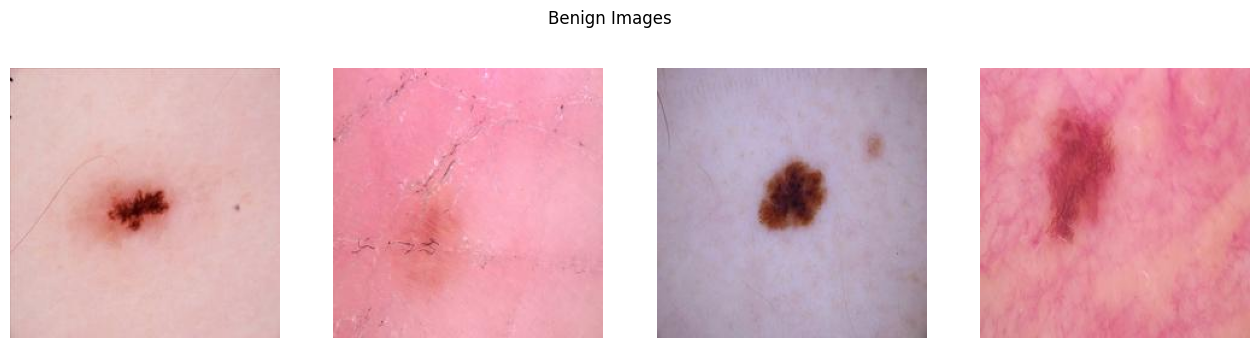

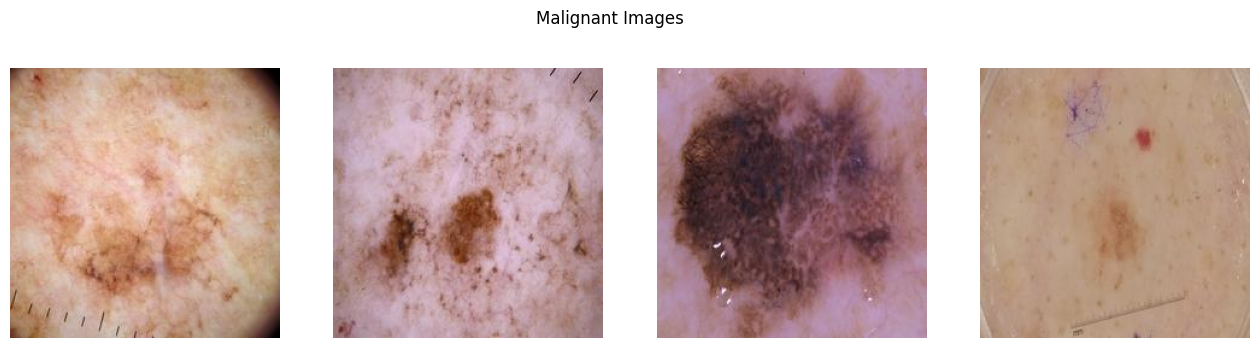

In [ ]:
# Function to display images
def display_images(category, num_images=4):
    dir_path = os.path.join(train_dir, category)
    image_paths = [os.path.join(dir_path, img) for img in os.listdir(dir_path)[:num_images]]
    plt.figure(figsize=(4 * num_images, 4))  # Adjust the figure size to fit all images in one row
    for i, image_path in enumerate(image_paths):
        plt.subplot(1, num_images, i + 1)  # Change the subplot configuration to 1 row and num_images columns
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"{category} Images")
    plt.show()

# Display images
display_images('Benign')
display_images('Malignant')


## 4.0 Load and Preprocess Datasets

### 4.1 Load and Preprocess Datasets for Model 1

In [168]:
batch_size_1 = 128

# Creating a training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=batch_size_1,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=123  # Seed for shuffling and transformations
)

# Creating a validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(224, 224),
    batch_size=batch_size_1,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=123  # Seed for shuffling and transformations
)

# Creating a test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=batch_size_1,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=123  # Seed for shuffling and transformations
)


Found 11180 files belonging to 2 classes.
Found 2236 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### 4.2 Load and Preprocess Datasets for Model 2

In [169]:
batch_size_2 = 64

# Creating a training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=batch_size_2,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=123  # Seed for shuffling and transformations
)

# Creating a validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(224, 224),
    batch_size=batch_size_2,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=123  # Seed for shuffling and transformations
)

# Creating a test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=batch_size_2,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=123  # Seed for shuffling and transformations
)


Found 11180 files belonging to 2 classes.
Found 2236 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### 4.3 Load and Preprocess Datasets for Model 3

In [170]:
batch_size_3 = 32

# Creating a training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=batch_size_3,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=456  # Seed for shuffling and transformations
)

# Creating a validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(224, 224),
    batch_size=batch_size_3,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=456  # Seed for shuffling and transformations
)

# Creating a test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=batch_size_3,
    label_mode='binary',  # 'binary' label mode for binary classification
    seed=456  # Seed for shuffling and transformations
)


Found 11180 files belonging to 2 classes.
Found 2236 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## 5.0 Optimize Dataset Performance with Prefetching

In [171]:
# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


## 6.0 Compile Models

### 6.1 Compile Model 1 with Adam Optimizer

In [ ]:
# Compile the model using Adam as the optimizer
model_1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


### 6.2 Compile Model 2 with SGD Optimizer

In [ ]:
# Compile the model using SGD as the optimizer
model_2.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


### 6.3 Compile Model 3 with Nadam Optimizer

In [ ]:
# Compile the model using Nadam as the optimizer
model_3.compile(
    loss='binary_crossentropy',
    optimizer=Nadam(learning_rate=0.001),
    metrics=['accuracy']
)


## 7.0 Define Callbacks for Early Stopping and Model Checkpointing

In [ ]:
# Define callbacks

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_1_checkpoint = ModelCheckpoint('melanoma_cnn_model.keras', save_best_only=True)
model_2_checkpoint = ModelCheckpoint('melanoma_cnn_model.keras', save_best_only=True)
model_3_checkpoint = ModelCheckpoint('melanoma_cnn_model.keras', save_best_only=True)


## 8.0 Define Learning Rate Scheduler Callback

In [ ]:
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1).numpy())  # Convert tensor to float

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)


## 9.0 Model Training

### 9.1 Train Model 1 with Callbacks and Learning Rate Scheduler

In [178]:
history_1 = model_1.fit(
      train_dataset,
      steps_per_epoch= (2*len(os.listdir(train_dir)))//batch_size_1,
      epochs=20,
      validation_data=validation_dataset,
      validation_steps=(2*len(os.listdir(validation_dir)))//batch_size_1,
      callbacks=[early_stopping, model_1_checkpoint, lr_scheduler]
      )


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.7633 - loss: 5.4628 - val_accuracy: 0.7241 - val_loss: 1.4579 - learning_rate: 0.0010
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 458s 1s/step - accuracy: 0.8456 - loss: 0.8380 - val_accuracy: 0.8649 - val_loss: 0.7095 - learning_rate: 0.0010
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.8691 - loss: 0.6914 - val_accuracy: 0.8148 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 309s 881ms/step - accuracy: 0.8884 - loss: 0.5816 - val_accuracy: 0.8703 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 303s 867ms/step - accuracy: 0.8971 - loss: 0.5139 - val_accuracy: 0.9177 - val_loss: 0.4692 - learning_rate: 0.0010
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.9140 - loss: 0.4664 - val_accuracy: 0.8690 - val_loss: 0.5256 - learning_rate: 9.0484e-04
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.9121 

### 9.2 Train Model 2 with Callbacks and Learning Rate Scheduler

In [179]:
history_2 = model_2.fit(
      train_dataset,
      steps_per_epoch= (2*len(os.listdir(train_dir)))//batch_size_2,
      epochs=20,
      validation_data=validation_dataset,
      validation_steps=(2*len(os.listdir(validation_dir)))//batch_size_2,
      callbacks=[early_stopping, model_2_checkpoint, lr_scheduler]
      )


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 312s 886ms/step - accuracy: 0.7384 - loss: 2.4566 - val_accuracy: 0.8050 - val_loss: 1.8807 - learning_rate: 0.0100
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 310s 887ms/step - accuracy: 0.8308 - loss: 1.7651 - val_accuracy: 0.7147 - val_loss: 1.7563 - learning_rate: 0.0100
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.8411 - loss: 1.5869 - val_accuracy: 0.8399 - val_loss: 1.4730 - learning_rate: 0.0100
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 313s 893ms/step - accuracy: 0.8498 - loss: 1.4148 - val_accuracy: 0.7697 - val_loss: 1.4295 - learning_rate: 0.0100
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 308s 879ms/step - accuracy: 0.8509 - loss: 1.2777 - val_accuracy: 0.8470 - val_loss: 1.1981 - learning_rate: 0.0100
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 307s 877ms/step - accuracy: 0.8645 - loss: 1.1584 - val_accuracy: 0.8690 - val_loss: 1.0951 - learning_rate: 0.0090
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 306s 875ms/step - accuracy:

### 9.3 Train Model 3 with Callbacks and Learning Rate Scheduler

In [180]:
history_3 = model_3.fit(
      train_dataset,
      steps_per_epoch= (2*len(os.listdir(train_dir)))//batch_size_3,
      epochs=20,
      validation_data=validation_dataset,
      validation_steps=(2*len(os.listdir(validation_dir)))//batch_size_3,
      callbacks=[early_stopping, model_3_checkpoint, lr_scheduler]
      )


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1199s 3s/step - accuracy: 0.7215 - loss: 19.6749 - val_accuracy: 0.7343 - val_loss: 7.3717 - learning_rate: 0.0010
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1187s 3s/step - accuracy: 0.7574 - loss: 6.6028 - val_accuracy: 0.6606 - val_loss: 3.1094 - learning_rate: 0.0010
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1209s 3s/step - accuracy: 0.8066 - loss: 2.7271 - val_accuracy: 0.8193 - val_loss: 2.1997 - learning_rate: 0.0010
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1188s 3s/step - accuracy: 0.8229 - loss: 2.0195 - val_accuracy: 0.8287 - val_loss: 1.7848 - learning_rate: 0.0010
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1196s 3s/step - accuracy: 0.8204 - loss: 1.7388 - val_accuracy: 0.8265 - val_loss: 1.3644 - learning_rate: 0.0010
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1615s 5s/step - accuracy: 0.8311 - loss: 1.2995 - val_accuracy: 0.8157 - val_loss: 1.1952 - learning_rate: 9.0484e-04
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1590s 5s/step - accuracy: 0.823

## 10.0 Define Function to Evaluate Models on Test Dataset

In [182]:
def evaluate_model(model, dataset, total_samples, batch_size):
    # Calculate the number of steps needed to go through the test set
    test_steps = total_samples // batch_size
    if total_samples % batch_size != 0:
        test_steps += 1
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(dataset, steps=test_steps)
    print(f'{model.name} Test Accuracy: {test_acc:.2f}')

total_samples = 2000  # manually setting the total number of samples in test set

# batch_size_1, batch_size_2, and batch_size_3 are defined
batch_size_1 = batch_size_1
batch_size_2 = batch_size_2
batch_size_3 = batch_size_3

# 'test_dataset' is defined and properly batched
evaluate_model(model_1, test_dataset, total_samples, batch_size_1)
evaluate_model(model_2, test_dataset, total_samples, batch_size_2)
evaluate_model(model_3, test_dataset, total_samples, batch_size_3)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9925 - loss: 0.1502
sequential_28 Test Accuracy: 0.99
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.8047 - loss: 1.9057
sequential_30 Test Accuracy: 0.80
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 476ms/step - accuracy: 0.7402 - loss: 7.4907
sequential_31 Test Accuracy: 0.74


## 11.0 Plot Training and Validation Accuracy and Loss

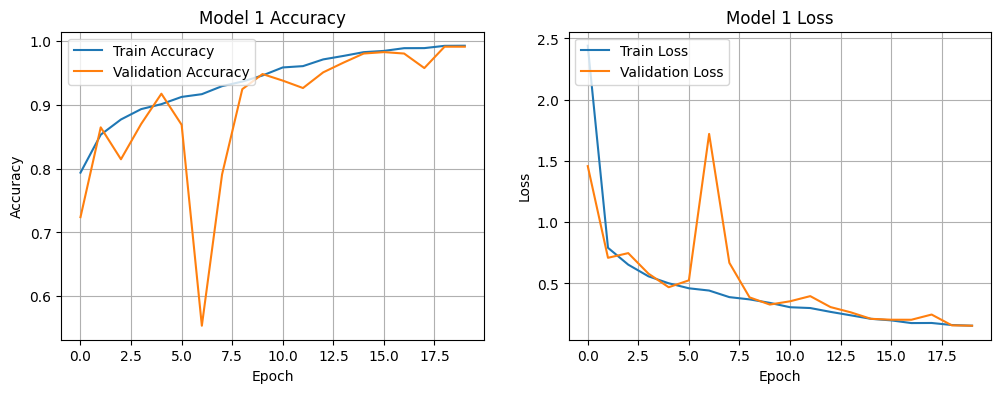

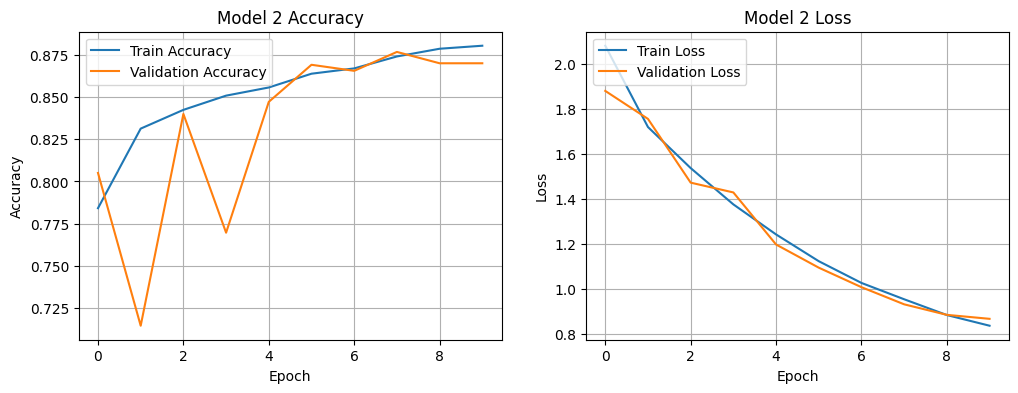

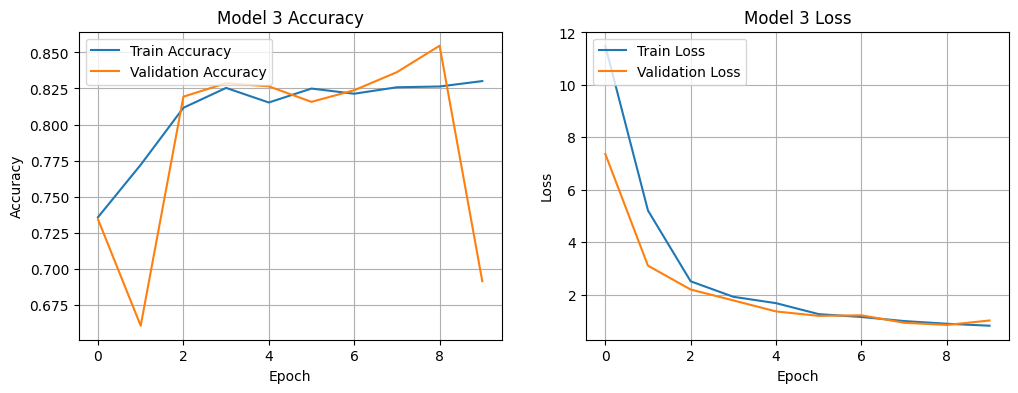

In [ ]:
def plot_model_history(history, model_name):
    # Set up the plotting layout
    plt.figure(figsize=(12, 4))
    
    # Plot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Plot for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Show the plots
    plt.show()

# history_1, history_2, and history_3 are defined and contain the training history data
plot_model_history(history_1, 'Model 1')
plot_model_history(history_2, 'Model 2')
plot_model_history(history_3, 'Model 3')


## 12.0 Evaluate Model with Confusion Matrix and Classification Report

In [ ]:
def evaluate_model(model, dataset, threshold=0.5):
    Y_pred = []
    y_true = []
    
    for x_batch, y_batch in dataset:
        preds = model.predict_on_batch(x_batch)
        Y_pred.extend(preds)
        y_true.extend(y_batch.numpy())

    Y_pred = np.array(Y_pred).flatten()
    y_true = np.array(y_true)
    y_pred = (Y_pred > threshold).astype('int32')

    if len(y_pred) > len(y_true):
        y_pred = y_pred[:len(y_true)]

    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=['Benign', 'Malignant'])

    print(f'Confusion Matrix for {model.name}')
    print(conf_matrix)
    print(f'\nClassification Report for {model.name}')
    print(class_report)
    
    return y_true, y_pred


## 13.0 Plot Confusion Matrix for Model Evaluation

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_labels = ['Benign', 'Malignant']

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


## 14.0 Evaluate and Plot Confusion Matrices for Multiple Models

Confusion Matrix for sequential_28
[[1100   18]
 [   1 1117]]

Classification Report for sequential_28
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99      1118
   Malignant       0.98      1.00      0.99      1118

    accuracy                           0.99      2236
   macro avg       0.99      0.99      0.99      2236
weighted avg       0.99      0.99      0.99      2236



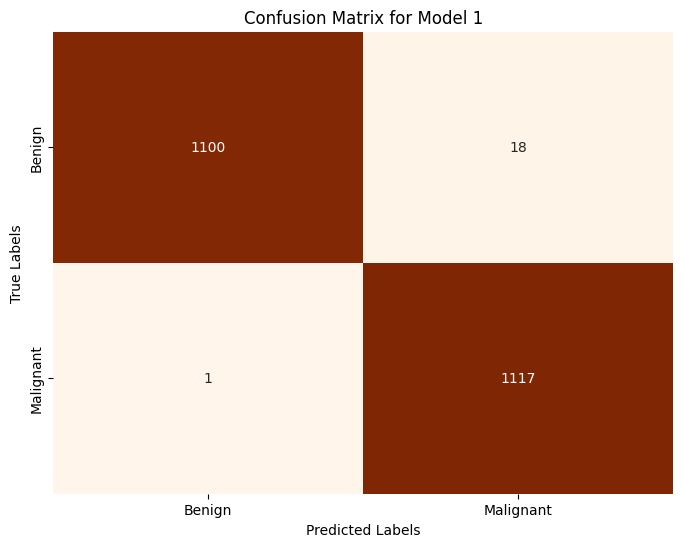

Confusion Matrix for sequential_30
[[ 779  339]
 [  97 1021]]

Classification Report for sequential_30
              precision    recall  f1-score   support

      Benign       0.89      0.70      0.78      1118
   Malignant       0.75      0.91      0.82      1118

    accuracy                           0.81      2236
   macro avg       0.82      0.81      0.80      2236
weighted avg       0.82      0.81      0.80      2236



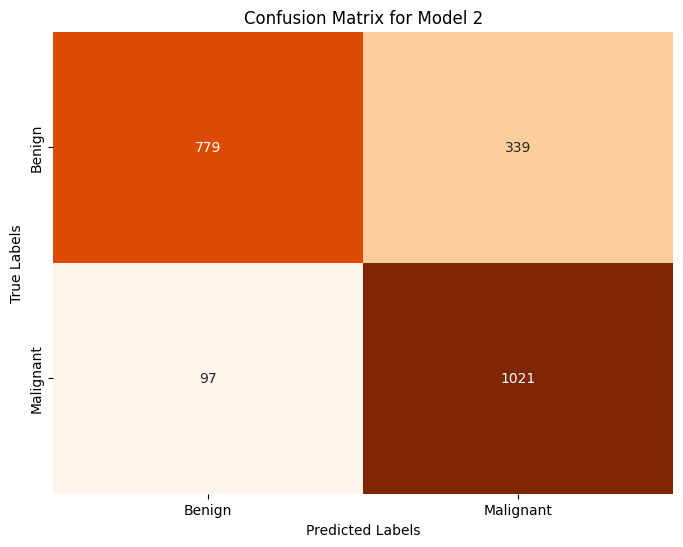

Confusion Matrix for sequential_31
[[821 297]
 [297 821]]

Classification Report for sequential_31
              precision    recall  f1-score   support

      Benign       0.73      0.73      0.73      1118
   Malignant       0.73      0.73      0.73      1118

    accuracy                           0.73      2236
   macro avg       0.73      0.73      0.73      2236
weighted avg       0.73      0.73      0.73      2236



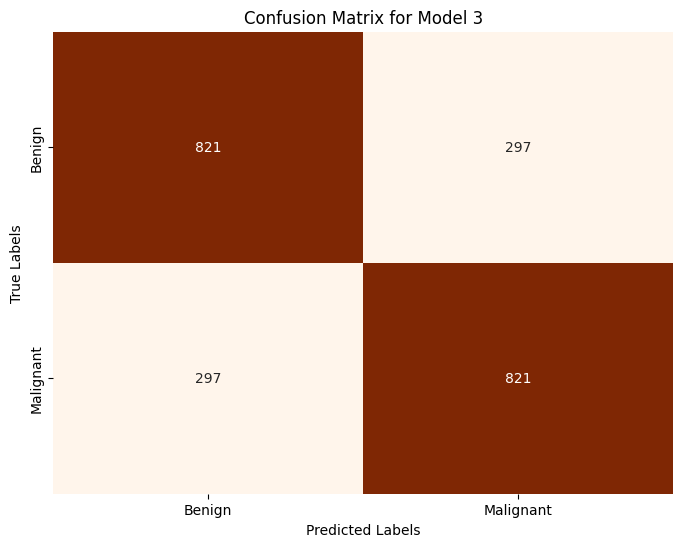

In [186]:
# model_1, model_2, model_3, and validation_dataset defination
y_true_1, y_pred_1 = evaluate_model(model_1, validation_dataset)
plot_confusion_matrix(y_true_1, y_pred_1, "Model 1")

y_true_2, y_pred_2 = evaluate_model(model_2, validation_dataset)
plot_confusion_matrix(y_true_2, y_pred_2, "Model 2")

y_true_3, y_pred_3 = evaluate_model(model_3, validation_dataset)
plot_confusion_matrix(y_true_3, y_pred_3, "Model 3")


## 15.0 Save Trained Models for Future Use

In [187]:
# save the model to retrieve it without having to run training all over again.
model_1.save('model_1_in_Easy.keras')
model_2.save('model_2_in_Easy.keras')
model_3.save('model_3_in_Easy.keras')
